In [ ]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import statistics as stat

CREATING THE MODEL

In [ ]:
class softmax:
  # nb_epochs : nb of times the model is trained
  # lr : learning rate used to compute the (batch) gradient ascent
  # k = nb of classes 
  # theta : the parameters of the model
  # verbose : if True, info related to the training of the model are printed out
  def __init__(self, theta, nb_epochs, lr, k=3, verbose = True): 
    self.theta = theta
    self.k = k
    self.lr = lr
    self.nb_epochs = nb_epochs
    self.verbose = verbose
  
  def phi_i(self, i, x):
    n = self.theta.shape[1] # nb of features
    num = np.exp(np.dot(self.theta[i], np.array(np.transpose(x)).reshape(n,1)))
    denom = 0
    for v in range(self.k):
      denom += np.exp(np.dot(self.theta[v], np.array(np.transpose(x)).reshape(n,1)))
    return num/denom
  
  # Vector of probabilities for point x to be in each possible class
  def h(self, x):  # x of the form X.iloc[i][:]

    n =  self.theta.shape[1]

    def phi_i(self, i, x):
      num = np.exp(np.dot(self.theta[i], np.array(np.transpose(x)).reshape(n,1)))
      denom = 0
      for v in range(self.k):
        denom += np.exp(np.dot(self.theta[v], np.array(np.transpose(x)).reshape(n,1)))
      return num/denom

    h = []
    for i in range(self.k):
      h.append(phi_i(self, i, x))
    return np.array(h)
  
  #------------------------------------ FIT ----------------------------------------

  def fit(self, X, y):

    N = X.shape[0] # nb of inputs
    n = self.theta.shape[1] # nb of features

    def phi_i(self, i, x):
      num = np.exp(np.dot(self.theta[i], np.array(np.transpose(x)).reshape(n,1)))
      denom = 0
      for v in range(self.k):
        denom += np.exp(np.dot(self.theta[v], np.array(np.transpose(x)).reshape(n,1)))
      return num/denom
    
    def log_likelihood(self, X, y):
      sum = 0
      for i in range(N):
        prod = 1
        for l in range(self.k):
          # the indicator function is easily computed as a if else condition
          if y[i] ==  l:
            prod = prod*phi_i(self, l, X.iloc[i][:])
        sum += np.log(prod)
      return sum

    # print initial log-likelihood
    if self.verbose == True:
      print("Initial log-likelihood: ", log_likelihood(self, X, y))
    for epoch in range(self.nb_epochs):
      # One update of theta -> update theta_{u,v} for u in {0,1,2} and v in {0,1,...,n-1}
      for u in range(self.k):
        for v in range(n):
          #----------------------------------------------------------------------------------
          # Compute the partial derivative of the log-likelihood with respect to theta_{u,v}
          partial_derivative = 0
          for i in range(N):
            for l in range(self.k):
              if u == l and l == y[i]:
                partial_derivative += X.iloc[i][v] - phi_i(self, l, X.iloc[i][:])
              elif l != u and y[i] == l:
                partial_derivative -= X.iloc[i][v]*phi_i(self, u, X.iloc[i][:])
          #----------------------------------------------------------------------------------
        self.theta[u][v] += self.lr*partial_derivative 
      if self.verbose == True:
        # print some info about the evolution
        print("epoch : {}          log-likelihood : {}".format(epoch + 1, log_likelihood(self, X, y)))
    return self

  #----------------------------------------- PREDICT ------------------------------------------------
  
  def predict(self, X):
    N = X.shape[0] # nb of inputs

    def phi_i(self, i, x):
      n = self.theta.shape[1] # nb of features
      num = np.exp(np.dot(self.theta[i], np.array(np.transpose(x)).reshape(n,1)))
      denom = 0
      for v in range(self.k):
        denom += np.exp(np.dot(self.theta[v], np.array(np.transpose(x)).reshape(n,1)))
      return num/denom
    
    def get_class(l):
      classe = 0
      max = l[0]
      nb_class = len(l)
      for i in range(1, nb_class):
        if l[i] > max:
          max = l[i]
          classe = i
      return classe

    preds = []
    for l in range(N):
      h = []
      for i in range(self.k):
        h.append(phi_i(self, i, X[l]))
      preds.append(get_class(np.array(h)))
    return np.array(preds)  


IMPORTING THEN TESTING ON A DATASET

In [ ]:
from sklearn.datasets import load_iris

df = load_iris()

X = df.data[:,[1,2]]
X = pd.DataFrame(X, columns=["feature1", "feature2"])

y = df.target

X.head()

feature1  feature2
0       3.5       1.4
1       3.0       1.4
2       3.2       1.3
3       3.1       1.5
4       3.6       1.4

### PREPROCESSING

In [ ]:
from sklearn.utils import shuffle

# Shuffle the data before splitting it into training and testing sets

X = shuffle(X, random_state = 0)

indexes = X.index

y = y[indexes]

X.head()

feature1  feature2
114       2.8       5.1
62        2.2       4.0
33        4.2       1.4
107       2.9       6.3
7         3.4       1.5

In [ ]:
# Splitting the data into training and testing sets (without train_test_split)

train_size = 0.8
N = X.shape[0]

X_train, X_test = X.iloc[: int(train_size*N)][:], X.iloc[int(train_size*N) + 1 :][:]

y_train, y_test = y[: int(train_size*N)] , y[int(train_size*N) + 1 :]

In [ ]:
y_test[:10]

array([2, 0, 0, 2, 0, 2, 1, 1, 1, 2])

In [ ]:
# Normalize the features of the training set

mean1 = stat.mean(X_train["feature1"])
sd1 = stat.stdev(X_train["feature1"])

X_train["feature1"] = (X_train["feature1"] - mean1)/sd1
                 
mean2 = stat.mean(X_train["feature2"])
sd2 = stat.stdev(X_train["feature2"])
X_train["feature2"] = (X_train["feature2"] - mean2)/sd2

In [ ]:
X_train.head()

feature1  feature2
114 -0.578059  0.768641
62  -1.938199  0.141567
33   2.595600 -1.340609
107 -0.351369  1.452722
7    0.782080 -1.283602

### SOFTMAX TRAINING

In [ ]:
theta_init = np.array([[2., 1.],[-3., 1.],[0., 3.]])

# Building the model
softmax = softmax(theta= theta_init, nb_epochs=10, lr=0.01, k = 3)
softmax.fit(X_train, y_train)

Initial log-likelihood:  [-82.35553971]
epoch : 1          log-likelihood : [-70.17273047]
epoch : 2          log-likelihood : [-63.33767682]
epoch : 3          log-likelihood : [-59.35531757]
epoch : 4          log-likelihood : [-56.86945839]
epoch : 5          log-likelihood : [-55.17276075]
epoch : 6          log-likelihood : [-53.92793455]
epoch : 7          log-likelihood : [-53.01248987]
epoch : 8          log-likelihood : [-52.43428159]
epoch : 9          log-likelihood : [-52.22743939]
epoch : 10          log-likelihood : [-52.3338752]


## EVALUATION ON THE TESTING SET

In [ ]:
# Using the same normalization on X_test
X_test["feature1"] = (X_test["feature1"] - mean1)/sd1
X_test["feature2"] = (X_test["feature2"] - mean2)/sd2

y_preds = softmax.predict(np.array(X_test))

y_preds

array([2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1,
       0, 0, 0, 2, 1, 2, 0])

In [ ]:
softmax.h(X_test.iloc[0][:])

array([[1.49767550e-09],
       [7.42794117e-03],
       [9.92572057e-01]])

In [ ]:
confusion_matrix(y_test, y_preds)

array([[9, 0, 0],
       [0, 7, 4],
       [0, 0, 9]])

It looks like it struggles a bit to recognize the class 2 ... Let's try to explain why throught a plot

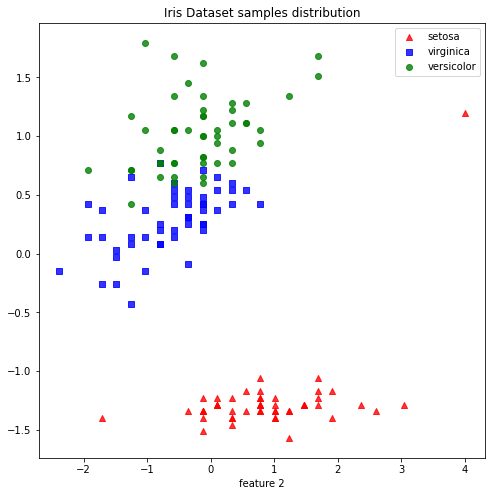

In [ ]:
fig = plt.figure(figsize=(8,8))

plt.scatter(X[y == 0]["feature1"],X[y == 0]["feature2"], c="red", alpha=0.8, marker='^', label="setosa")
plt.scatter(X[y == 1]["feature1"],X[y == 1]["feature2"], c="blue", alpha=0.8, marker="s", label="virginica")
plt.scatter(X[y == 2]["feature1"],X[y == 2]["feature2"], c="green", alpha=0.8, label="versicolor")
plt.xlabel("feature 1")
plt.xlabel("feature 2")
plt.title("Iris Dataset samples distribution")
plt.legend()
plt.plot()
plt.savefig('iris')

We can observe that the features of specimens from the classes 2 and 3 are pretty close, which explain the few confusions of the softmax between them (cf errors on the class 2)

There is no problem dealing with the class 1 (setosa) for it is graphically easily distinguisable from virginica and versicolor.  

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


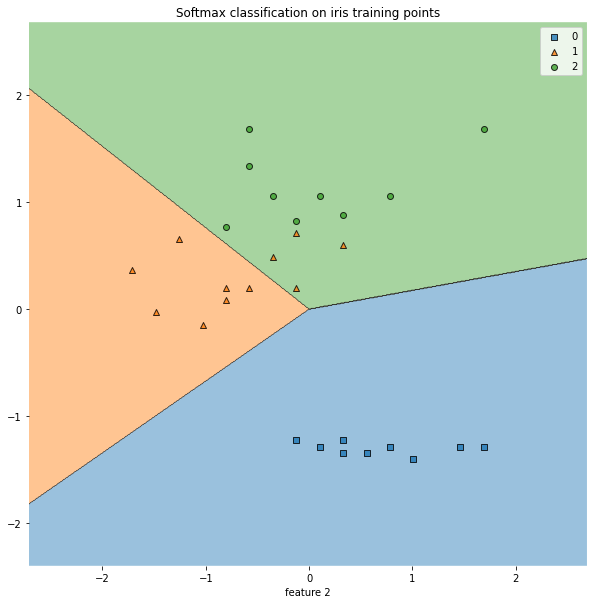

In [ ]:
from mlxtend.plotting import plot_decision_regions

figure = plt.figure(figsize = (10, 10))
plot_decision_regions(np.array(X_test), np.array(y_test), clf=softmax)
plt.xlabel("feature 1")
plt.xlabel("feature 2")
plt.title("Softmax classification on iris training points")
plt.legend()
plt.show()
figure.savefig('softmax_from_scratch')